# Understanding the problem statement and business case
* In this hand-on project, we will train 5 Machine Learning algorithms namely Linear Regression, Random Forest Regression, Decision Trees, Support Vector Machine and XGBoost to predict the price of used cars.
* INPUTS(FEATURES): Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight.
* OUTPUT: Price
* This project can be used by car dealerships to predict used car prices and understand key factors that contribute to used car prices.

# Libraries/dataset import

In [1]:
!pip install xgboost
!pip install wordcloud
!pip install plotly

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [3]:
car_df = pd.read_csv('ToyotaCorolla.csv') # create pandas datafrme "car_df"

In [4]:
car_df

Price  Age      KM FuelType   HP  MetColor  Automatic    CC  Doors   
0     $13,500    23  46,986   Diesel   90         1          0  2000      3  \
1     $13,750    23  72,937   Diesel   90         1          0  2000      3   
2     $13,950    24  41,711   Diesel   90         1          0  2000      3   
3     $14,950    26  48,000   Diesel   90         0          0  2000      3   
4     $13,750    30  38,500   Diesel   90         0          0  2000      3   
...        ...  ...     ...      ...  ...       ...        ...   ...    ...   
1431   $7,500    69  20,544   Petrol   86         1          0  1300      3   
1432  $10,845    72  19,000   Petrol   86         0          0  1300      3   
1433   $8,500    71  17,016   Petrol   86         0          0  1300      3   
1434   $7,250    70  16,916   Petrol   86         1          0  1300      3   
1435   $6,950    76       1   Petrol  110         0          0  1600      5   

      Weight  
0       1165  
1       1165  
2       1165  
3       1165  
4       1170  
...      ...  
1431    1025  
1432    1015  
1433    1015  
1434    1015  
1435    1114  

[1436 rows x 10 columns]

Display features columns

# Data Preprocessing (1)
* Check features
* Check shape
* Check missing values
* Check data types

### Features

In [5]:
car_df.columns #Display all column names

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

Check the shape and missing values

### Shape

In [6]:
car_df.shape # the shape of the dataframe "car_df"

(1436, 10)

### Missing values

In [7]:
car_df.isna().sum() # sum missing values of all columns

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

There are just 9 missing values, we will drop them

In [8]:
car_df = car_df.dropna() # drop the  missing values 

In [9]:
car_df.info() # show information of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   object
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   object
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 112.3+ KB


### Data types
* Convert 'Price' and 'KM' datatype to integer, we need to remove '$' str and comma ',' from these 2 columns

In [10]:
print(car_df['Price'].dtypes) # check datatypes of Price


object


In [11]:
print(car_df['KM'].dtypes) # check datatypes of Price


object


In [12]:
# convert to string
car_df['Price'] = car_df['Price'].astype(str)


In [13]:
# remove "$" and "," then convert to integer
car_df['Price'] = car_df['Price'].str.replace('$', '')
car_df['Price'] = car_df['Price'].str.replace(',', '')
car_df['Price'] = car_df['Price'].astype(int)


In [14]:
print(car_df['Price'].dtypes) # check datatypes of Price


int32


In [15]:
# remove "," then convert to integer
car_df['KM'] = car_df['KM'].str.replace(',', '')
car_df['KM'] = car_df['KM'].astype(int)

In [16]:
car_df.head(10)

Price  Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986   Diesel   90         1          0  2000      3    1165
1  13750   23  72937   Diesel   90         1          0  2000      3    1165
2  13950   24  41711   Diesel   90         1          0  2000      3    1165
3  14950   26  48000   Diesel   90         0          0  2000      3    1165
4  13750   30  38500   Diesel   90         0          0  2000      3    1170
5  12950   32  61000   Diesel   90         0          0  2000      3    1170
6  16900   27  94612   Diesel   90         1          0  2000      3    1245
7  18600   30  75889   Diesel   90         1          0  2000      3    1245
8  21500   27  19700   Petrol  192         0          0  1800      3    1185
9  12950   23  71138   Diesel   69         0          0  1900      3    1105

In [17]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int32 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int32 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int32(2), int64(7), object(1)
memory usage: 101.1+ KB


In [18]:
car_df = pd.get_dummies(car_df, columns=['FuelType'], prefix=['FuelType'])


In [19]:
car_df['FuelType_CNG'] = car_df['FuelType_CNG'].astype(int)
car_df['FuelType_Diesel'] = car_df['FuelType_Diesel'].astype(int)
car_df['FuelType_Petrol'] = car_df['FuelType_Petrol'].astype(int)

In [20]:
print(car_df['FuelType_CNG'].dtypes) # check datatypes of Price
car_df

int32


Price  Age     KM   HP  MetColor  Automatic    CC  Doors  Weight   
0     13500   23  46986   90         1          0  2000      3    1165  \
1     13750   23  72937   90         1          0  2000      3    1165   
2     13950   24  41711   90         1          0  2000      3    1165   
3     14950   26  48000   90         0          0  2000      3    1165   
4     13750   30  38500   90         0          0  2000      3    1170   
...     ...  ...    ...  ...       ...        ...   ...    ...     ...   
1431   7500   69  20544   86         1          0  1300      3    1025   
1432  10845   72  19000   86         0          0  1300      3    1015   
1433   8500   71  17016   86         0          0  1300      3    1015   
1434   7250   70  16916   86         1          0  1300      3    1015   
1435   6950   76      1  110         0          0  1600      5    1114   

      FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0                0                1                0  
1                0                1                0  
2                0                1                0  
3                0                1                0  
4                0                1                0  
...            ...              ...              ...  
1431             0                0                1  
1432             0                0                1  
1433             0                0                1  
1434             0                0                1  
1435             0                0                1  

[1436 rows x 12 columns]

### Dataset summary
* Coun, mean, std, min, max of each feature

In [21]:
# Generate descriptive statistics for data
car_df.describe()

Price          Age             KM           HP     MetColor   
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000  \
mean   10730.824513    55.947075   68533.259749   101.502089     0.674791   
std     3626.964585    18.599988   37506.448872    14.981080     0.468616   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     1.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     1.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

         Automatic           CC        Doors      Weight  FuelType_CNG   
count  1436.000000  1436.000000  1436.000000  1436.00000   1436.000000  \
mean      0.055710  1566.827994     4.033426  1072.45961      0.011838   
std       0.229441   187.182436     0.952677    52.64112      0.108196   
min       0.000000  1300.000000     2.000000  1000.00000      0.000000   
25%       0.000000  1400.000000     3.000000  1040.00000      0.000000   
50%       0.000000  1600.000000     4.000000  1070.00000      0.000000   
75%       0.000000  1600.000000     5.000000  1085.00000      0.000000   
max       1.000000  2000.000000     5.000000  1615.00000      1.000000   

       FuelType_Diesel  FuelType_Petrol  
count      1436.000000      1436.000000  
mean          0.107939         0.880223  
std           0.310411         0.324814  
min           0.000000         0.000000  
25%           0.000000         1.000000  
50%           0.000000         1.000000  
75%           0.000000         1.000000  
max           1.000000         1.000000

In [22]:
# Print the max value of column 'Price'
print('Maximum price for used car: ', car_df['Price'].max())

Maximum price for used car:  32500


In [23]:
#Print the minimum value of column 'Price'
print('Minimum price for used car: ', car_df['Price'].min())

Minimum price for used car:  4350


### Visualization

* Scatter plots for relationship and histograms for univariate distributions

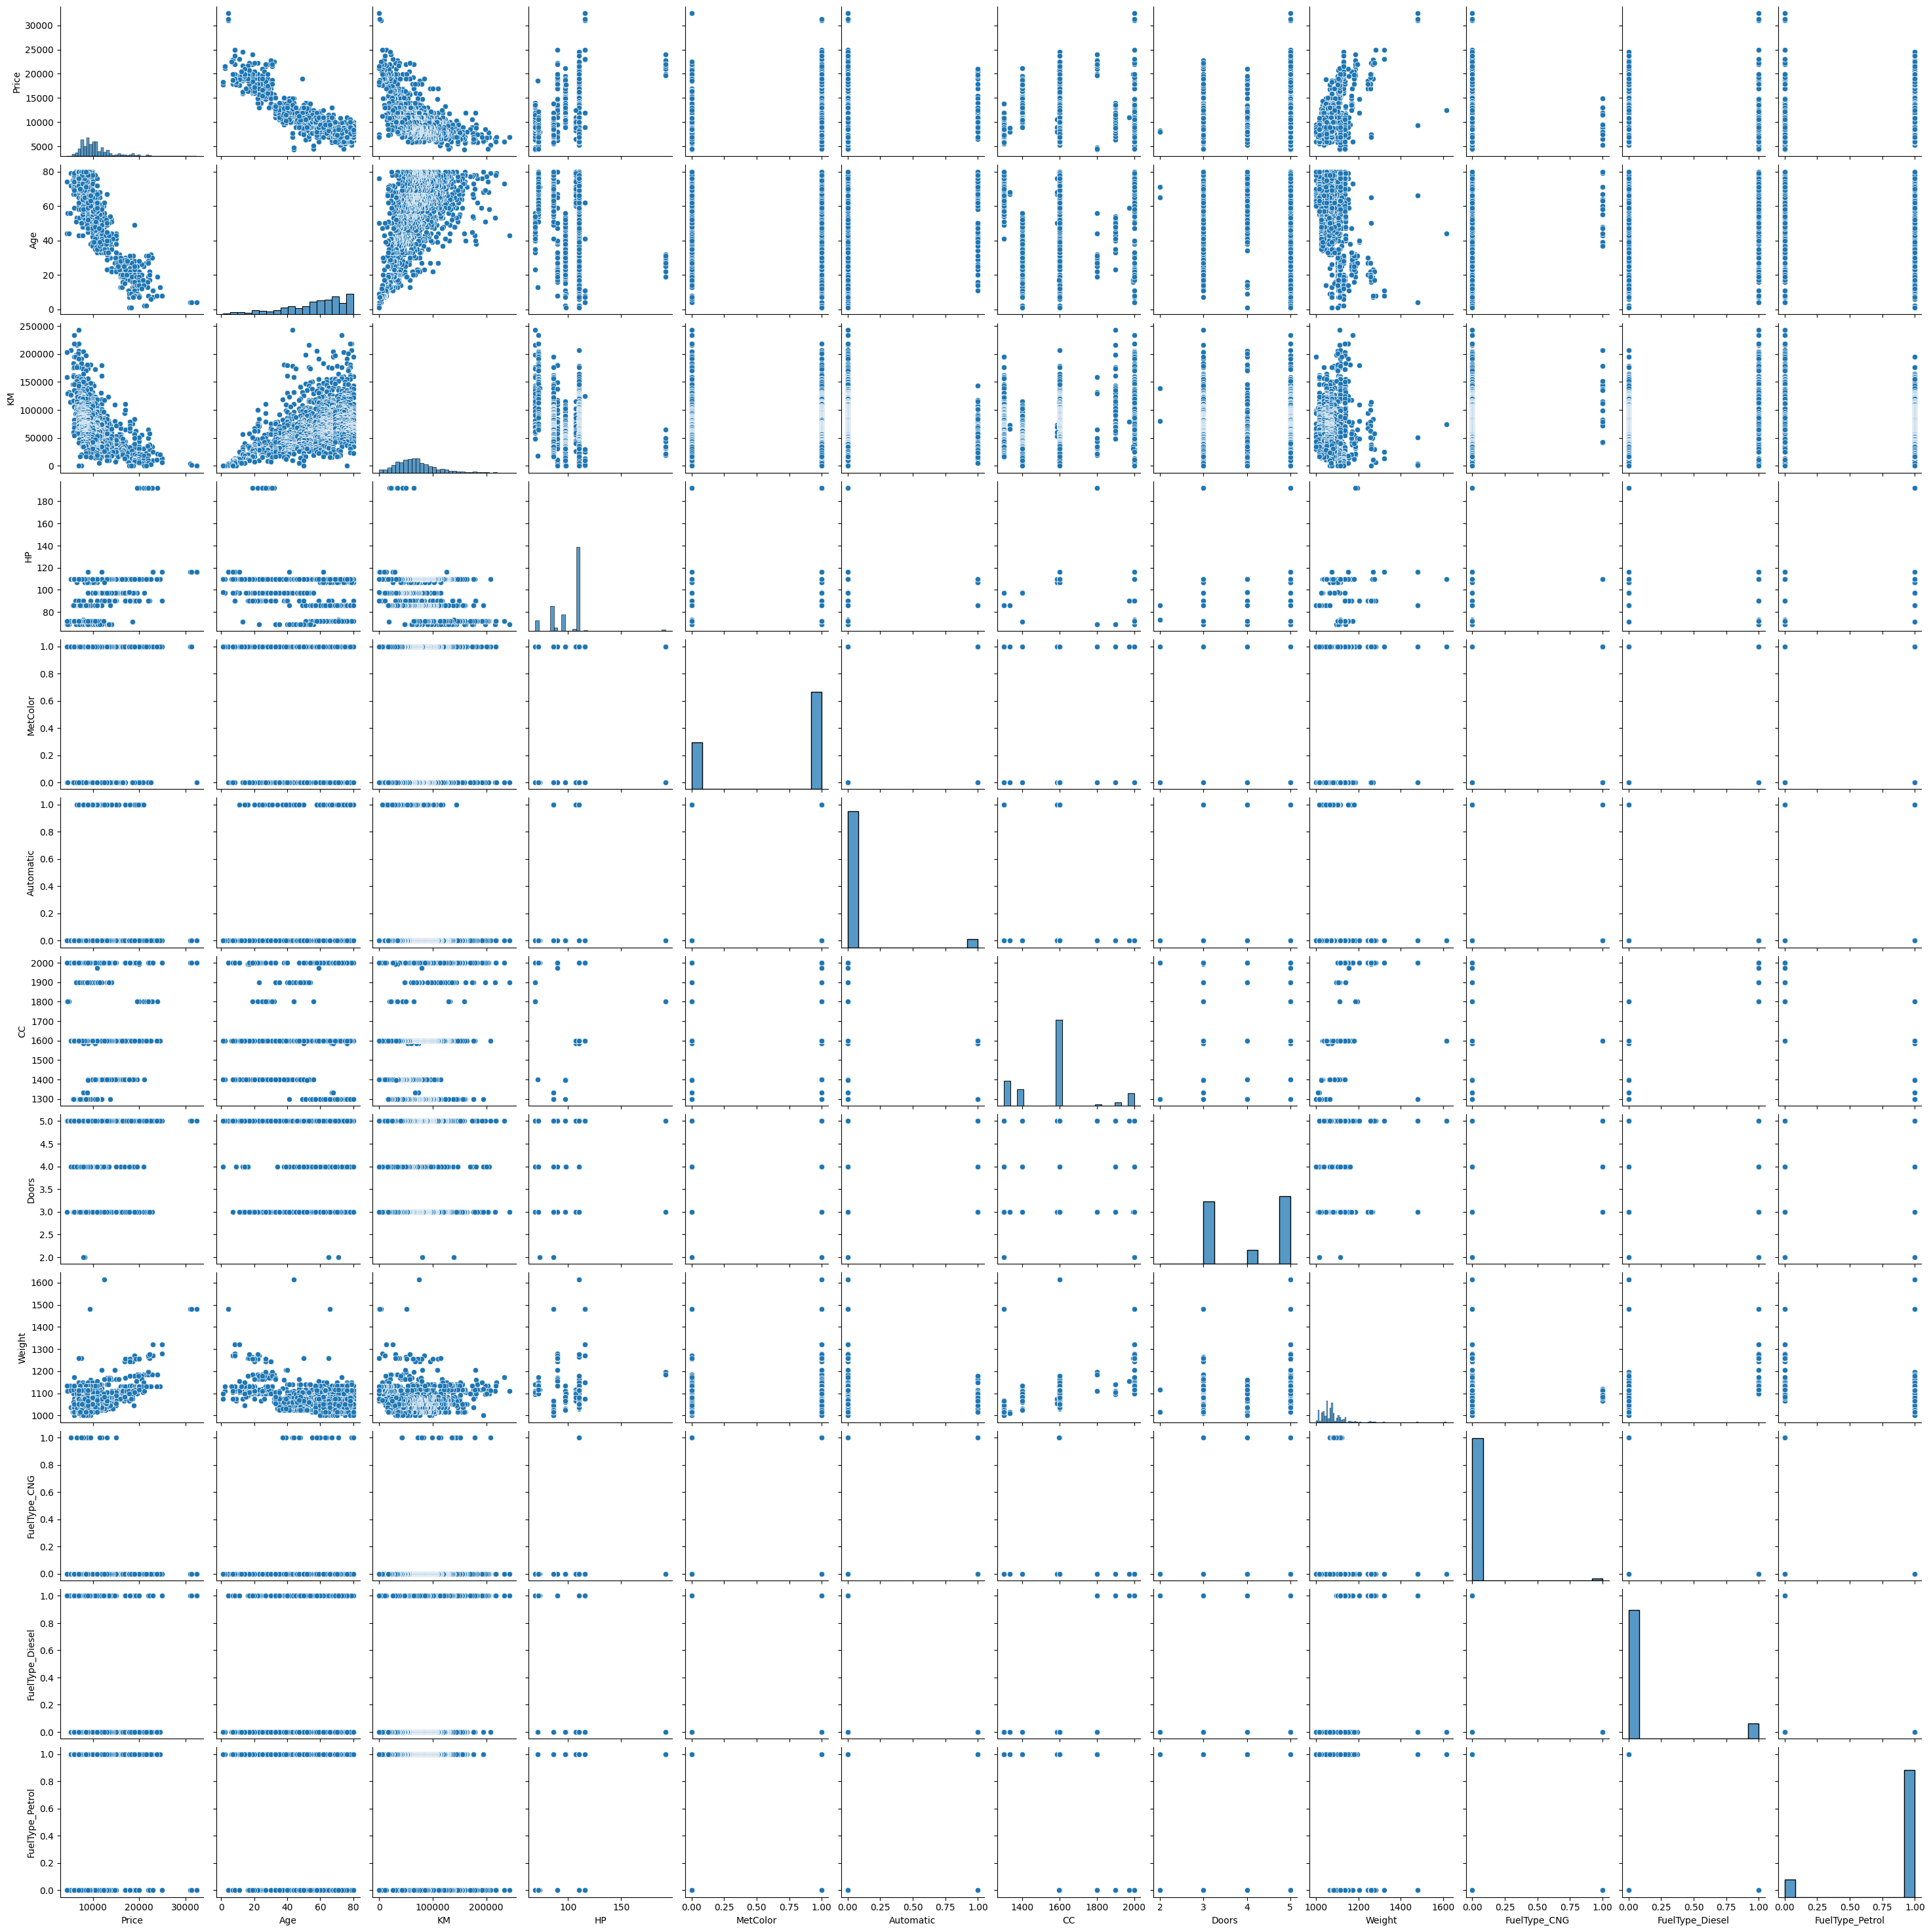

In [24]:
# To plot multiple pairwise bivariate distributions in a dataset,
# but the diagonal plots show the density of the points
sns.pairplot(data=car_df)

What's going on?
It seems that there is a linear trend between 'Horsepower' and 'Price', probably it have a direct impact on the price.


In [25]:
# Create a histogram showing the count number of each manufacturer
fig = px.histogram(car_df, x = 'FuelType_CNG',
                   labels = {'Fuel': 'CNG'},
                   title = 'CNG VARIATION',
                   color_discrete_sequence = ['maroon']
                   )
fig.show()

In [26]:
fig = px.bar(car_df, x='FuelType_CNG', y='HP', color='FuelType_CNG',
             title='Horsepower vs. Fuel Type_CNG',
             labels={'FuelType_CNG': 'Fuel Type', 'HP': 'Horsepower'},
             color_discrete_sequence=['maroon'])
fig1 = px.bar(car_df, x='FuelType_Petrol', y='HP', color='FuelType_Petrol',
             title='Horsepower vs. Fuel Type_Petrol',
             labels={'FuelType_Petrol': 'Fuel Type', 'HP': 'Horsepower'},
             color_discrete_sequence=['maroon', 'green', 'blue'])
fig2 = px.bar(car_df, x='FuelType_Diesel', y='HP', color='FuelType_Diesel',
             title='Horsepower vs. Fuel Type_Diesel',
             labels={'FuelType_Diesel': 'Fuel Type', 'HP': 'Horsepower'},
             color_discrete_sequence=['maroon', 'green', 'blue'])


fig.show()
fig1.show()
fig2.show()



In [27]:
import plotly.express as px

# Assuming you have a DataFrame named car_df
# Create a scatter plot of HP against Price
fig = px.scatter(car_df, x='HP', y='Price', title='Horsepower vs. Price',
                 labels={'HP': 'Horsepower', 'Price': 'Price'})

fig.show()

In [28]:
import plotly.express as px

# Assuming you have a DataFrame named car_df
# Create a bar graph of HP against Price
fig = px.bar(car_df, x='HP', y='Price', title='Horsepower vs. Price',
             labels={'HP': 'Horsepower', 'Price': 'Price'})

fig.show()

In [29]:
# Create a histogram showing the count number of each 'Type' oF Fuel
fig = px.histogram(car_df, x='FuelType_CNG',
                   labels = {'FuelType':'FuelType_CNG'},
                   title = 'FuelType_CNG',
                   color_discrete_sequence = ['brown','green','blue']
                   )
fig.show()

* Correlation matrix

In [30]:
# Compute pairwise correlation of columns, excluding NA/null values
car_df.corr()

Price       Age        KM        HP  MetColor  Automatic   
Price            1.000000 -0.876590 -0.569960  0.314990  0.108905   0.033081  \
Age             -0.876590  1.000000  0.505672 -0.156622 -0.108150   0.031717   
KM              -0.569960  0.505672  1.000000 -0.333538 -0.080503  -0.081854   
HP               0.314990 -0.156622 -0.333538  1.000000  0.058712   0.013144   
MetColor         0.108905 -0.108150 -0.080503  0.058712  1.000000  -0.019335   
Automatic        0.033081  0.031717 -0.081854  0.013144 -0.019335   1.000000   
CC               0.165067 -0.133182  0.302150  0.050884  0.034921  -0.069321   
Doors            0.185326 -0.148359 -0.036197  0.092424  0.085243  -0.027654   
Weight           0.581198 -0.470253 -0.028598  0.089614  0.057929   0.057249   
FuelType_CNG    -0.039536  0.002389  0.144016  0.062109  0.021009   0.001486   
FuelType_Diesel  0.054084 -0.097740  0.403060 -0.533453 -0.012420  -0.084490   
FuelType_Petrol -0.038516  0.092611 -0.433160  0.489110  0.004872   0.080249   

                       CC     Doors    Weight  FuelType_CNG  FuelType_Diesel   
Price            0.165067  0.185326  0.581198     -0.039536         0.054084  \
Age             -0.133182 -0.148359 -0.470253      0.002389        -0.097740   
KM               0.302150 -0.036197 -0.028598      0.144016         0.403060   
HP               0.050884  0.092424  0.089614      0.062109        -0.533453   
MetColor         0.034921  0.085243  0.057929      0.021009        -0.012420   
Automatic       -0.069321 -0.027654  0.057249      0.001486        -0.084490   
CC               1.000000  0.126768  0.651450      0.019335         0.761667   
Doors            0.126768  1.000000  0.302618      0.009680         0.025495   
Weight           0.651450  0.302618  1.000000      0.052756         0.568087   
FuelType_CNG     0.019335  0.009680  0.052756      1.000000        -0.038074   
FuelType_Diesel  0.761667  0.025495  0.568087     -0.038074         1.000000   
FuelType_Petrol -0.734334 -0.027589 -0.560470     -0.296717        -0.942976   

                 FuelType_Petrol  
Price                  -0.038516  
Age                     0.092611  
KM                     -0.433160  
HP                      0.489110  
MetColor                0.004872  
Automatic               0.080249  
CC                     -0.734334  
Doors                  -0.027589  
Weight                 -0.560470  
FuelType_CNG           -0.296717  
FuelType_Diesel        -0.942976  
FuelType_Petrol         1.000000

<Axes: >

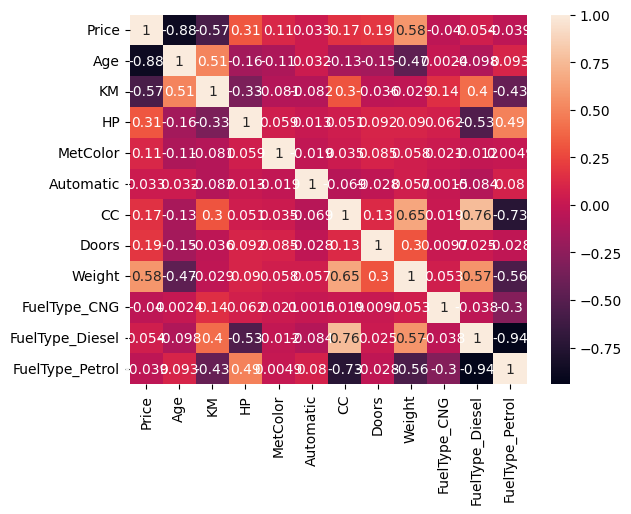

In [31]:
# Use heatmap to visualize the correlation of columns
# for a complete guide to heatmap see: https://chartio.com/learn/charts/heatmap-complete-guide/
# Correlation Concepts, Matrix & Heatmap using Seaborn see: https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/
sns.heatmap(car_df.corr(), annot=True)

We can see that the feature with highest correlation to 'Price' seems to be 'Weight' with 0.581

# Data Preprocessing (2)
* Perform One-Hot Encoding for 'FuelType'
* Split the dataset into Train and Test parts


* One-hot encoding

In [34]:
car_df.head(10)

Price  Age     KM   HP  MetColor  Automatic    CC  Doors  Weight   
0  13500   23  46986   90         1          0  2000      3    1165  \
1  13750   23  72937   90         1          0  2000      3    1165   
2  13950   24  41711   90         1          0  2000      3    1165   
3  14950   26  48000   90         0          0  2000      3    1165   
4  13750   30  38500   90         0          0  2000      3    1170   
5  12950   32  61000   90         0          0  2000      3    1170   
6  16900   27  94612   90         1          0  2000      3    1245   
7  18600   30  75889   90         1          0  2000      3    1245   
8  21500   27  19700  192         0          0  1800      3    1185   
9  12950   23  71138   69         0          0  1900      3    1105   

   FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
0             0                1                0  
1             0                1                0  
2             0                1                0  
3             0                1                0  
4             0                1                0  
5             0                1                0  
6             0                1                0  
7             0                1                0  
8             0                0                1  
9             0                1                0

Split dependent and independent variables

In [35]:
# Split column 'price' from the rest of the columns and save in variable X as features and y as target variable
X = car_df.drop(columns=['Price'], axis=1)
y = car_df['Price']

In [36]:
X

Age     KM   HP  MetColor  Automatic    CC  Doors  Weight  FuelType_CNG   
0      23  46986   90         1          0  2000      3    1165             0  \
1      23  72937   90         1          0  2000      3    1165             0   
2      24  41711   90         1          0  2000      3    1165             0   
3      26  48000   90         0          0  2000      3    1165             0   
4      30  38500   90         0          0  2000      3    1170             0   
...   ...    ...  ...       ...        ...   ...    ...     ...           ...   
1431   69  20544   86         1          0  1300      3    1025             0   
1432   72  19000   86         0          0  1300      3    1015             0   
1433   71  17016   86         0          0  1300      3    1015             0   
1434   70  16916   86         1          0  1300      3    1015             0   
1435   76      1  110         0          0  1600      5    1114             0   

      FuelType_Diesel  FuelType_Petrol  
0                   1                0  
1                   1                0  
2                   1                0  
3                   1                0  
4                   1                0  
...               ...              ...  
1431                0                1  
1432                0                1  
1433                0                1  
1434                0                1  
1435                0                1  

[1436 rows x 11 columns]

In [37]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int32

In [38]:
# Set 80% of the data as training data set and the rest (20%) as the testing data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print('X Train dataset shape = ', X_train.shape)
print('y Train dataset shape = ', y_train.shape)
print('X Test dataset shape = ', X_test.shape)
print('y Test dataset shape = ', y_test.shape)

X Train dataset shape =  (1148, 11)
y Train dataset shape =  (1148,)
X Test dataset shape =  (288, 11)
y Test dataset shape =  (288,)


# Model (1)
* Linear Regression

In [39]:
# Involve linear regression model
L_model = LinearRegression()
# Let training data set to train our linear regression model
L_model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Use the testing data set to test the accuracy of the model
# The accuracy_score function compares the true labels with the predicted labels
# and returns the accuracy score as a value between 0 and 1.
accuracy_L_model = L_model.score(X_test, y_test)
print('Score = ', accuracy_L_model)

Score =  0.8581862102700177


# Model (2)
* Support Vector Machine

In [41]:
from sklearn.svm import SVR  # for regression tasks

# For regression:
svm_model = SVR(kernel='linear')  # Similar to classification, you can change the kernel type

# Training the SVM:
# svm_classifier.fit(X_train, y_train)  # For classification
svm_model.fit(X_train, y_train)   # For regression


SVR(kernel='linear')

In [42]:
accuracy_svm = svm_model.score(X_test, y_test)  # Compare predicted labels with actual labels
print(f'Accuracy: {accuracy_svm *100:.2f}%')

Accuracy: 80.71%


# Model (3)
* Decision tree


In [43]:
# Involve the decision tree regression model
DecisionTree_model = DecisionTreeRegressor()
# Let the training data set to train our decision tree regression model
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [44]:
# Use the testing data set to test the accuracy of the predicting model
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
print('Score Decision Tree = ', accuracy_DecisionTree)

Score Decision Tree =  0.8320749716469861


# Model (4)
* Random forest

In [45]:
# Invole the random forest regression model
RandomForest_model = RandomForestRegressor(n_estimators=5, max_depth=5)
# Let the training data set to train the random forest regression model
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [46]:
# Use the random forest regression model to test the accuracy of the trained model
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
print('Score Random Forest = ', accuracy_RandomForest)

Score Random Forest =  0.8846352126357455


# Model (5)
* XGBoost

In [47]:
# Involve in the XGRegression model
model = XGBRegressor(objective ='reg:squarederror',
                     base_score=0.5,
                     learning_rate=0.15
                     )
# Let the training data set to train this model
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
# Use the testing data set to test the accuracy of this model
accuracy_XGBoost = model.score(X_test, y_test)
print('Score XGBoost = ', accuracy_XGBoost)

Score XGBoost =  0.9032480878717216


In [49]:
Model_list=['Linear reg','Random forest','XGBoost','SVM','Decision Tree']

In [50]:

Rmse_list=[]

# Model comparison

* Linear regression

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual price of the used cars ($)')]

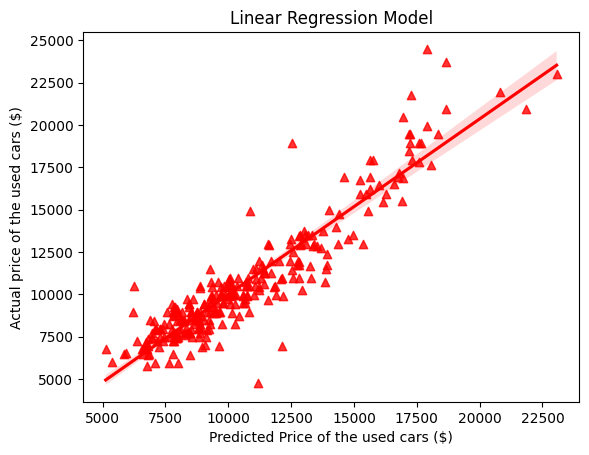

In [51]:
# predict quantities with the finalized regression model by calling the predict() function on the finalized model.
y_predict_linear = L_model.predict(X_test)
# This method is used to plot data and a linear regression model fit
fig = sns.regplot(x=y_predict_linear, y=y_test, color='red', marker='^')
fig.set(title='Linear Regression Model',
        xlabel='Predicted Price of the used cars ($)',
        ylabel = 'Actual price of the used cars ($)'
        )

In [52]:
# RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function
# he Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares
# Mean Absolute Error calculates the average difference between the calculated values and actual values
# Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model.
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear))))
MSE = mean_squared_error(y_test, y_predict_linear)
MAE = mean_absolute_error(y_test, y_predict_linear)
r2 = r2_score(y_test, y_predict_linear)
print('RMSE =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)
Rmse_list.append(RMSE)

RMSE = 1366.3930618650227 
MSE = 1867029.999512872 
MAE = 934.0265518315807 
R2 = 0.8581862102700177


* Random forest

[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars($)'),
 Text(0, 0.5, 'Actual price of the used cars ($)')]

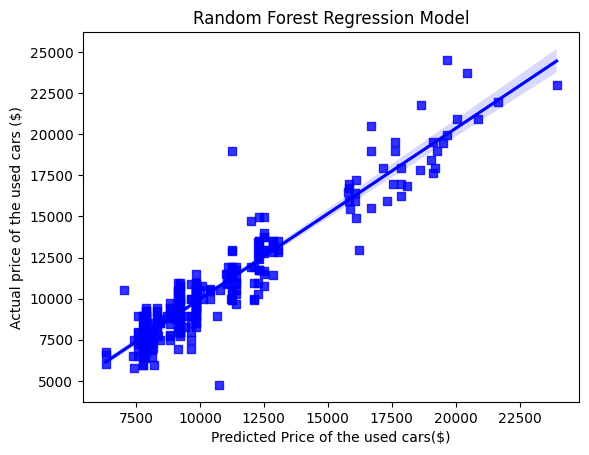

In [53]:
# predict quantities with the finalized regression model by calling the predict() function on the finalized model.
y_predict_RandomForest = RandomForest_model.predict(X_test)
# This method is used to plot data and a linear regression model fit
fig = sns.regplot(x=y_predict_RandomForest, y=y_test, color='blue', marker='s')
fig.set(title='Random Forest Regression Model',
        xlabel='Predicted Price of the used cars($)',
        ylabel = 'Actual price of the used cars ($)'
        )

In [54]:
# RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function
# he Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares
# Mean Absolute Error calculates the average difference between the calculated values and actual values
# Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model.
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest))))
MSE = mean_squared_error(y_test, y_predict_RandomForest)
MAE = mean_absolute_error(y_test, y_predict_RandomForest)
r2 = r2_score(y_test, y_predict_RandomForest)
print('RMSE =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)
Rmse_list.append(RMSE)

RMSE = 1232.4038649073723 
MSE = 1518819.286238629 
MAE = 877.0642030840041 
R2 = 0.8846352126357455


* XGBoost

[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used cars($)'),
 Text(0, 0.5, 'Actual price of the used cars ($)')]

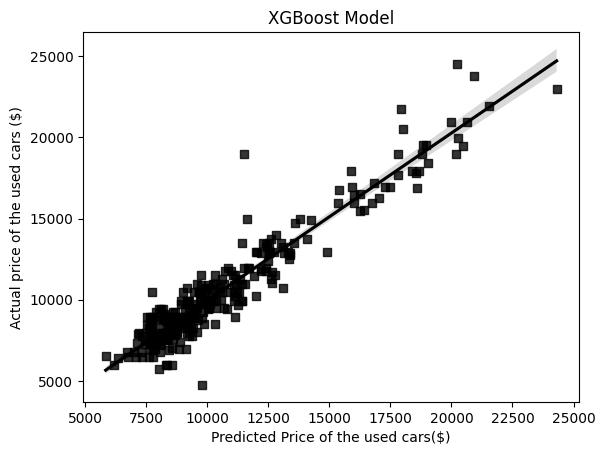

In [55]:
y_predict_XGBoost = model.predict(X_test)
# This method is used to plot data and a linear regression model fit
fig = sns.regplot(x=y_predict_XGBoost, y=y_test, color='black', marker='s')
fig.set(title='XGBoost Model',
        xlabel='Predicted Price of the used cars($)',
        ylabel = 'Actual price of the used cars ($)'
        )

In [56]:
# RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function
# he Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares
# Mean Absolute Error calculates the average difference between the calculated values and actual values
# Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model.

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost))))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)
print('RMSE =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)
Rmse_list.append(RMSE)

RMSE = 1128.6159798614262 
MSE = 1273774.0299985674 
MAE = 811.7046440972222 
R2 = 0.9032480878717216


* Support vector machine

[Text(0.5, 1.0, 'Support Vector Machine Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual price of the used cars ($)')]

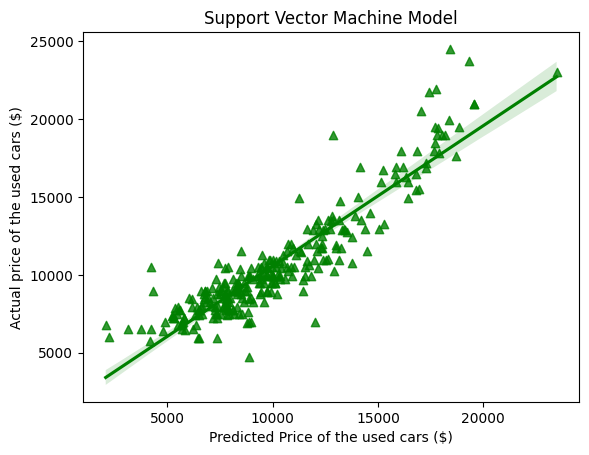

In [57]:
# predict quantities with the finalized regression model by calling the predict() function on the finalized model.
y_predict_svm = svm_model.predict(X_test)
# This method is used to plot data and svm model fit
fig = sns.regplot(x=y_predict_svm, y=y_test, color='green', marker='^')
fig.set(title='Support Vector Machine Model',
        xlabel='Predicted Price of the used cars ($)',
        ylabel = 'Actual price of the used cars ($)'
        )

In [58]:
# RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function
# he Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares
# Mean Absolute Error calculates the average difference between the calculated values and actual values
# Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model.

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_svm))))
MSE = mean_squared_error(y_test, y_predict_svm)
MAE = mean_absolute_error(y_test, y_predict_svm)
r2 = r2_score(y_test, y_predict_svm)
print('RMSE =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)
Rmse_list.append(RMSE)

RMSE = 1593.6161811806517 
MSE = 2539612.532920804 
MAE = 1195.0327294032988 
R2 = 0.80709893368975


* Decision Tree

[Text(0.5, 1.0, 'Decision Tree Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual price of the used cars ($)')]

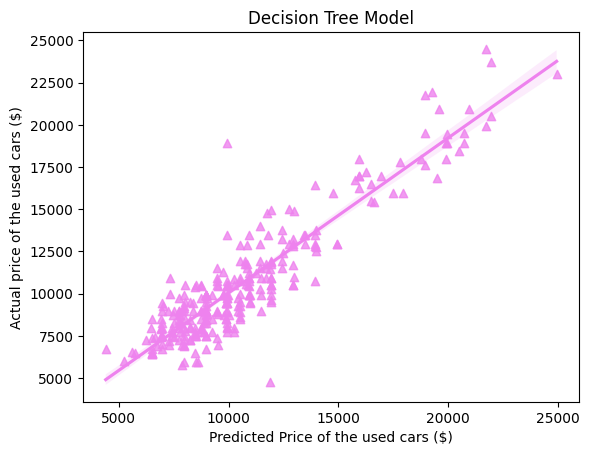

In [59]:
# predict quantities with the finalized regression model by calling the predict() function on the finalized model.
y_predict_DecisionTree_model = DecisionTree_model.predict(X_test)
# This method is used to plot data and svm model fit
fig = sns.regplot(x=y_predict_DecisionTree_model, y=y_test, color='violet', marker='^')
fig.set(title='Decision Tree Model',
        xlabel='Predicted Price of the used cars ($)',
        ylabel = 'Actual price of the used cars ($)'
        )

In [60]:
# RMSE is an acronym for Root Mean Square Error, which is the square root of value obtained from Mean Square Error function
# he Mean Squared Error (MSE) or Mean Squared Deviation (MSD) of an estimator measures the average of error squares
# Mean Absolute Error calculates the average difference between the calculated values and actual values
# Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model.

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_DecisionTree_model))))
MSE = mean_squared_error(y_test, y_predict_DecisionTree_model)
MAE = mean_absolute_error(y_test, y_predict_DecisionTree_model)
r2 = r2_score(y_test, y_predict_DecisionTree_model)
print('RMSE =', RMSE,'\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)
Rmse_list.append(RMSE)

RMSE = 1486.8738784966113 
MSE = 2210793.9305555555 
MAE = 1111.6527777777778 
R2 = 0.8320749716469861


In [61]:
print(Rmse_list)

[1366.3930618650227, 1232.4038649073723, 1128.6159798614262, 1593.6161811806517, 1486.8738784966113]


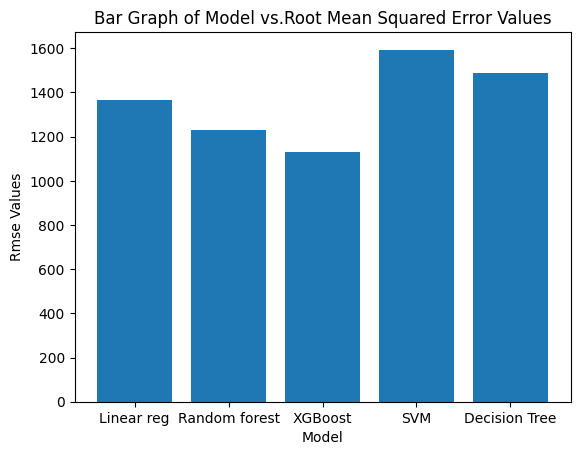

In [62]:
plt.bar(Model_list, Rmse_list)

# Add labels and a title
plt.xlabel('Model')
plt.ylabel('Rmse Values')
plt.title('Bar Graph of Model vs.Root Mean Squared Error Values')

# Display the graph
plt.show()

* From the above graph (Bar Graph of Model vs.Root Mean Squared Error Values)its very clear that the XGBoost model has the lowest RMSE and the highest Accuracy.It therefore, suits to be the best recommendable model *